<a href="https://colab.research.google.com/github/j-santillan-cruz/projects/blob/main/Stock_data_scrapper_Yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import csv
import matplotlib.pylab as plt
import numpy.random as npr
import scipy.stats as scs
from scipy.stats import norm
%matplotlib inline

from datetime import datetime

In [ ]:
!-

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 786.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38617 sha256=dd2bfae8ec7c05d97118a4070410a5be324fcd84be145c77d28f7920dcd070cc
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


In [ ]:
from yahoofinancials import YahooFinancials
from datetime import datetime

def retrive_stock_data(ticker,start,end):
  json = YahooFinancials(ticker).get_historical_price_data(start, end, "weekly")
  df = pd.DataFrame(columns=["open","close","adjclose"])
  for row in json [ticker]["prices"]:
    date = datetime.fromisoformat(row["formatted_date"])
    df.loc[date] = [row["open"],row["close"],row["adjclose"]]
  df.index.name = "date"
  return df

In [ ]:
SP500 = retrive_stock_data("^SPX","2000-01-01","2023-11-17")
fig = plt.figure()
fig.set_size_inches(10,3)
SP500["adjclose"].plot()

<Axes: xlabel='date'>

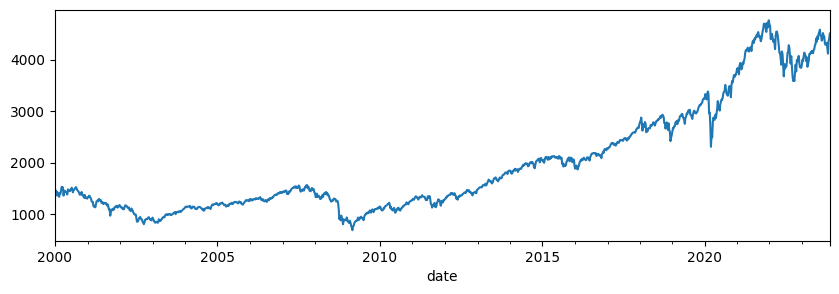

In [ ]:
SP500 = retrive_stock_data("^SPX","2000-01-01","2023-11-17")
fig = plt.figure()
fig.set_size_inches(10,3)
SP500["adjclose"].plot()

In [ ]:
def retrive_stock_data_daily(ticker,start,end):
  json = YahooFinancials(ticker).get_historical_price_data(start, end, "daily")
  df = pd.DataFrame(columns=["open","close","adjclose"])
  for row in json [ticker]["prices"]:
    date = datetime.fromisoformat(row["formatted_date"])
    df.loc[date] = [row["open"],row["close"],row["adjclose"]]
  df.index.name = "date"
  return df

def retrive_stock_data_weekly(ticker,start,end):
  json = YahooFinancials(ticker).get_historical_price_data(start, end, "weekly")
  df = pd.DataFrame(columns=["open","close","adjclose"])
  for row in json [ticker]["prices"]:
    date = datetime.fromisoformat(row["formatted_date"])
    df.loc[date] = [row["open"],row["close"],row["adjclose"]]
  df.index.name = "date"
  return df

def retrive_stock_data_monthly(ticker,start,end):
  json = YahooFinancials(ticker).get_historical_price_data(start, end, "monthly")
  df = pd.DataFrame(columns=["open","close","adjclose"])
  for row in json [ticker]["prices"]:
    date = datetime.fromisoformat(row["formatted_date"])
    df.loc[date] = [row["open"],row["close"],row["adjclose"]]
  df.index.name = "date"
  return df

<Axes: xlabel='date'>

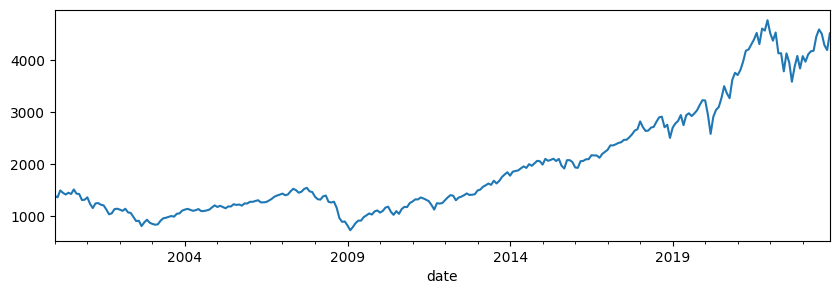

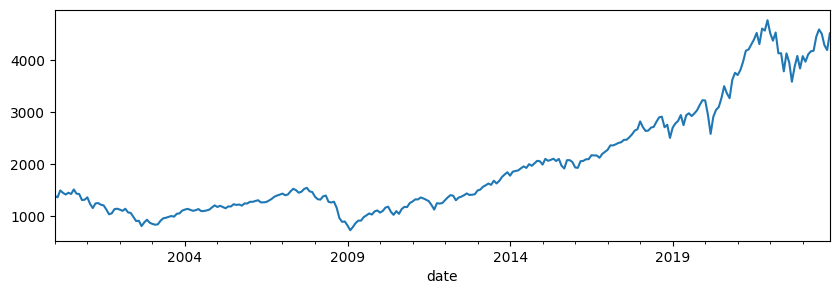

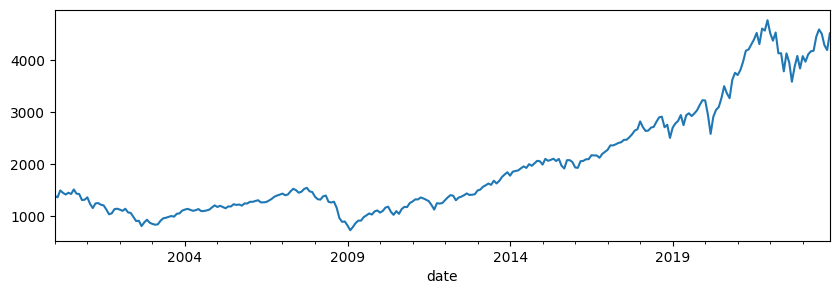

In [ ]:
SP500_daily = retrive_stock_data_daily("^SPX","2000-01-01","2023-11-17")
fig = plt.figure()
fig.set_size_inches(10,3)
SP500["adjclose"].plot()


SP500_weekly = retrive_stock_data_weekly("^SPX","2000-01-01","2023-11-17")
fig = plt.figure()
fig.set_size_inches(10,3)
SP500["adjclose"].plot()


SP500_monthly = retrive_stock_data_monthly("^SPX","2000-01-01","2023-11-17")
fig = plt.figure()
fig.set_size_inches(10,3)
SP500["adjclose"].plot()

In [ ]:
SP500_daily['Log_ret'] = np.log(SP500_daily['close'] / SP500_daily['close'].shift(1))
SP500_daily['Volatility'] = SP500_daily['Log_ret'].rolling(center=False, window=12).std() * np.sqrt(12)
SP500_daily["Average"] = SP500_daily["Log_ret"].rolling(center=False, window=12).mean() * (12)
SP500_daily.tail()

,open,close,adjclose,Log_ret,Volatility,Average
date,,,,,,
2023-11-10,4364.149902,4415.240234,4415.240234,0.015496,0.032657,0.053133
2023-11-13,4406.660156,4411.549805,4411.549805,-0.000836,0.028189,0.064200
2023-11-14,4458.970215,4495.700195,4495.700195,0.018895,0.028827,0.087907
2023-11-15,4505.299805,4502.879883,4502.879883,0.001596,0.028877,0.077564
2023-11-16,4497.080078,4508.240234,4508.240234,0.001190,0.029355,0.072300


In [ ]:
SP500_weekly['Log_ret'] = np.log(SP500_weekly['close'] / SP500_monthly['close'].shift(1))
SP500_weekly['Volatility'] = SP500_weekly['Log_ret'].rolling(center=False, window=12).std() * np.sqrt(12)
SP500_weekly.tail()

,open,close,adjclose,Log_ret,Volatility
date,,,,,
2023-10-14,4342.370117,4224.160156,4224.160156,NaN,NaN
2023-10-21,4210.399902,4117.370117,4117.370117,NaN,NaN
2023-10-28,4139.390137,4358.339844,4358.339844,NaN,NaN
2023-11-04,4364.270020,4415.240234,4415.240234,NaN,NaN
2023-11-11,4406.660156,4508.240234,4508.240234,NaN,NaN


In [ ]:
SP500_monthly['Log_ret'] = np.log(SP500_monthly['close'] / SP500_monthly['close'].shift(1))
SP500_monthly['Volatility'] = SP500_monthly['Log_ret'].rolling(center=False, window=12).std() * np.sqrt(12)
SP500_monthly.tail()

,open,close,adjclose,Log_ret,Volatility
date,,,,,
2023-07-01,4450.479980,4588.959961,4588.959961,0.030664,0.191107
2023-08-01,4578.830078,4507.660156,4507.660156,-0.017875,0.185126
2023-09-01,4530.600098,4288.049805,4288.049805,-0.049946,0.158591
2023-10-01,4284.520020,4193.799805,4193.799805,-0.022225,0.146901
2023-11-01,4201.270020,4514.020020,4514.020020,0.073581,0.155392


<Axes: xlabel='date'>

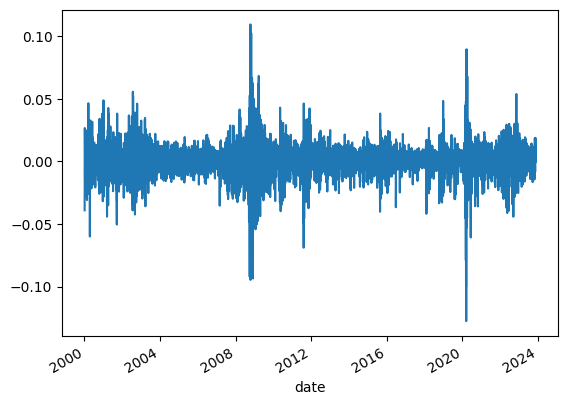

In [ ]:
SP500_daily['Log_ret'].plot()

<Axes: xlabel='date'>

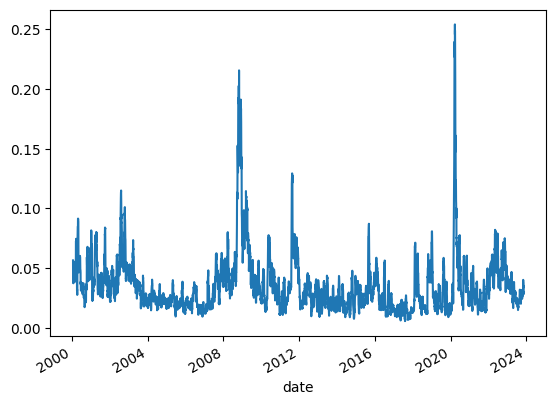

In [ ]:
SP500_daily['Volatility'].plot()